In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score

Importando as bibliotecas necessárias para a resolução do desafio.

In [3]:
from IPython.core.pylabtools import figsize

figsize(12, 9)

sns.set()

Ajustando o tamanho as figuras que forem geradas usando o seaborn

In [4]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

Lendo os arquivos .csv e criando os datasets de treino e teste.

In [5]:
if set(df_test.columns).issubset(set(df_train.columns)):print('Os dados são válidos')

Os dados são válidos


## Buscando a correlação entre as features e o target

In [6]:
df_train.corr()

,Unnamed: 0,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,...,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041
Unnamed: 0,1.000000,NaN,-0.007258,-0.007250,-0.007201,0.003678,0.005707,-0.006217,-0.004527,-0.004615,...,0.001520,0.018074,0.001693,-0.008141,0.002724,-0.004914,0.003906,0.001002,-0.010967,-0.029937
NU_ANO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CO_MUNICIPIO_RESIDENCIA,-0.007258,NaN,1.000000,0.999865,-0.002296,0.020813,-0.236178,0.009710,0.865294,0.865216,...,0.004115,-0.030114,-0.050304,-0.050138,-0.040668,-0.013479,-0.032710,-0.094862,-0.077456,-0.033205
CO_UF_RESIDENCIA,-0.007250,NaN,0.999865,1.000000,-0.002017,0.020947,-0.234786,0.009433,0.864791,0.864919,...,0.003968,-0.030345,-0.050096,-0.049292,-0.040688,-0.013647,-0.032467,-0.094113,-0.076838,-0.033149
NU_IDADE,-0.007201,NaN,-0.002296,-0.002017,1.000000,0.533462,0.009675,-0.017713,-0.030711,-0.030259,...,-0.044791,0.025077,-0.030681,0.012739,0.021949,-0.003569,-0.035306,-0.069973,-0.010988,0.160526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q037,-0.004914,NaN,-0.013479,-0.013647,-0.003569,0.002294,0.086642,0.032588,-0.024174,-0.024201,...,0.220839,0.225791,0.245757,0.202230,0.387722,1.000000,0.496678,0.254418,0.270380,0.187921
Q038,0.003906,NaN,-0.032710,-0.032467,-0.035306,-0.014725,0.069298,0.024112,-0.038666,-0.038305,...,0.159887,0.223508,0.215767,0.142610,0.378421,0.496678,1.000000,0.374424,0.259947,0.219529
Q039,0.001002,NaN,-0.094862,-0.094113,-0.069973,-0.066346,0.046830,0.011327,-0.097273,-0.096666,...,0.144264,0.206979,0.189252,0.225724,0.270343,0.254418,0.374424,1.000000,0.305357,0.262031
Q040,-0.010967,NaN,-0.077456,-0.076838,-0.010988,-0.022736,0.053556,0.014847,-0.081490,-0.080963,...,0.215292,0.176028,0.243190,0.179292,0.177025,0.270380,0.259947,0.305357,1.000000,0.306438


Buscando a correlação das variáveis do dataset com a nossa variável target NU_NOTA_MT. 

Porém, dado ao tamanho da tabela fica difícil a visualização.

In [11]:
corr_mt = df_train[df_train.columns[1:]].corr(method = 'spearman')['NU_NOTA_MT'][:]
corr_mt_sorted =corr_mt.sort_values(ascending=False)
corr_mt_sorted.head(6)

NU_NOTA_MT         1.000000
NU_NOTA_CH         0.486841
NU_NOTA_CN         0.454966
NU_NOTA_LC         0.454404
NU_NOTA_REDACAO    0.359829
NU_NOTA_COMP3      0.323907
Name: NU_NOTA_MT, dtype: float64

Para ter uma visão melhor das correlações, eu filtrei a correlações somente pela feature target, com o propósito de encontrar as 10 features melhor correlacionadas ao nosso target.  

In [9]:
corr_mt_sorted.isna().sum()

29

In [15]:
features = [x for x,y in corr_mt_sorted[1:5].items()] 
features_corr = [x for x,y in corr_mt_sorted[0:5].items()]

Criando uma lista com o nome das features melhor correlacionadas ao target.

In [16]:
features_corr

['NU_NOTA_MT', 'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']

In [10]:
df_train[features].shape

(13730, 3)

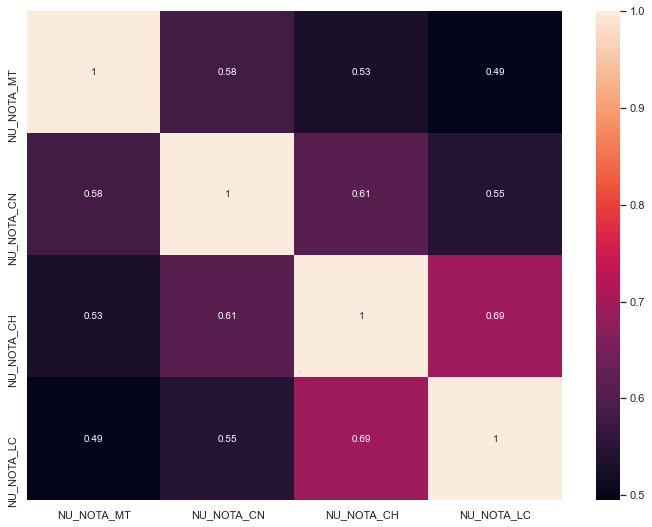

In [11]:
correlation = df_train[features_corr].corr()
sns.heatmap(correlation, annot=True, annot_kws={'size':10});

Mapa de correlação das features.

In [12]:
df_train[features_corr].describe()

,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC
count,10133.000000,10341.000000,10341.000000,10133.000000
mean,482.497928,473.495155,529.661087,516.472841
std,99.826323,71.093674,73.726344,68.688190
min,0.000000,0.000000,0.000000,0.000000
25%,408.900000,419.900000,480.400000,468.100000
50%,461.200000,459.800000,532.000000,520.900000
75%,537.600000,514.500000,581.200000,564.900000
max,952.000000,806.400000,807.000000,763.600000


Descrição estatística das features escolhidas

In [13]:
df_train[features].isna().sum()

NU_NOTA_CN    3389
NU_NOTA_CH    3389
NU_NOTA_LC    3597
dtype: int64

 Verificando a contagem de valores NaN nas features escolhidas.

### Tratando valores NaN

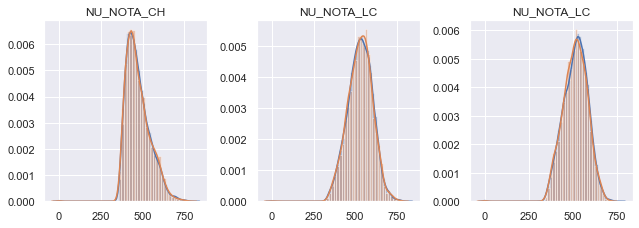

In [14]:
for i in range(1,len(features_corr)):
    if features_corr[i] != 'TP_DEPENDENCIA_ADM_ESC':
        plt.title(features_corr[i])
        ax=plt.subplot(3, 4, i)
        sns.distplot(df_train[features_corr[i]].dropna())
        sns.distplot(df_test[features_corr[i]].dropna())
        
        
        ax.set_title(features_corr[i])
        ax.set_xlabel('')
plt.tight_layout()


Verificando a distribuição para os datasets de treino ao retirarmos os valores NaN das features.

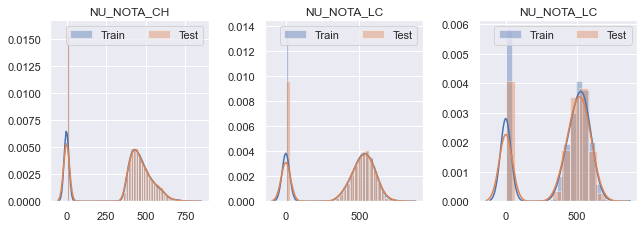

In [15]:

for i in range(1,len(features_corr)):
    if features_corr[i] != 'TP_DEPENDENCIA_ADM_ESC':
        plt.title(features_corr[i])
        ax=plt.subplot(3, 4, i)
        sns.distplot(df_train[features_corr[i]].fillna(0))
        sns.distplot(df_test[features_corr[i]].fillna(0))
        
        
        ax.set_title(features_corr[i])
        ax.set_xlabel('')
        plt.legend(labels=['Train', 'Test'], ncol=2, loc='upper right')
plt.tight_layout()
plt.show()

Os gráficos indicam que a imputação de zeros no lugar de valores NaN criam uma segunda 

In [16]:
aux_train = df_train[features_corr]
aux_test = df_test[features]

In [17]:
aux_train.fillna(0, inplace=True)
aux_test.fillna(0, inplace=True)

c:\users\marcel.rocha\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [18]:
aux_test.shape

(4576, 3)

In [19]:
aux_train.shape

(13730, 4)

In [20]:
target_train = aux_train['NU_NOTA_MT']
x_train = aux_train[features]
X_test = aux_test

In [21]:
target_train.head()

0    399.4
1    459.8
2      0.0
3      0.0
4      0.0
Name: NU_NOTA_MT, dtype: float64

## Regressão Linear

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
regressor = LinearRegression()
regressor.fit(x_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
predicted = regressor.predict(x_train)
predicted[:5]

array([519.40808235, 540.5052729 ,  -3.81661537,  -3.81661537,
        -3.81661537])

In [25]:
predicted_test = regressor.predict(X_test)

In [26]:
predicted.shape

(13730,)

In [27]:
target_train.shape

(13730,)

In [28]:
mean_squared_error(target_train, predicted)

5179.9199460058935

In [29]:
r2_score(target_train, predicted)

0.9010821003848966

## Teste random forest

In [30]:
random_forest = RandomForestRegressor(n_estimators=100, random_state=777)

In [31]:
random_forest.fit(x_train, target_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=777, verbose=0, warm_start=False)

In [32]:
rf_predicted = random_forest.predict(x_train)

In [33]:
rf_predicted_test = random_forest.predict(X_test)

In [34]:
round(mean_squared_error(target_train, rf_predicted), 4)

632.1404

In [35]:
round(r2_score(target_train, rf_predicted), 4)

0.9879

## Testes decision tree

In [36]:
decision_tree = DecisionTreeRegressor(criterion='mae', splitter= 'random', random_state=777)

In [37]:
decision_tree.fit(x_train, target_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=777, splitter='random')

In [38]:
dt_predicted = decision_tree.predict(x_train)

In [39]:
dt_predicted_test = decision_tree.predict(X_test)

In [40]:
round(mean_squared_error(target_train, dt_predicted), 4)

0.0

In [41]:
round(r2_score(target_train, dt_predicted), 4)

1.0

In [47]:
NU_INSCRICAO = df_test['NU_INSCRICAO'].values

In [43]:
final = pd.DataFrame(list(zip(NU_INSCRICAO, rf_predicted_test)), columns = ['NU_INSCRICAO', 'NU_NOTA_MT'])
final.to_csv('answer.csv', sep=',', index=False)